In [1]:
import numpy as np
import pandas as pd
import csv
from konlpy.tag import Okt
from collections import Counter
import re

In [2]:
main_df = pd.read_csv('main_df (2).csv',encoding='utf8')

In [3]:
main_df.head()

,file_name,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Year,Month,Day,Time,length_of_text,main_language,Group,ip
0,059faa80-e6d3-47ff-8a45-edf0fba4e398.eml,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2019.0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154
1,059fd5ff-a546-4924-a6e9-a14f3bba805d.eml,suminy@outlook.kr,from [167.139.250.4] by 73.132.221.32 with ESM...,"Mon, 20 Apr 2020 22:38:31 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Mon,22.0,509.0,ko,A,167.139.250.4
2,059fd98b-68f8-4722-8870-9671abfda544.eml,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3
3,059ffd38-f893-46ff-b65d-2f70da33dd90.eml,yenjuy@outlook.kr,from [208.206.157.152] by 73.132.221.32 with E...,"Sun, 05 Apr 2020 22:39:19 +0300",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Sun,22.0,217.0,ko,A,208.206.157.152
4,059ffe9c-b1a7-4b57-8174-8b0afe03366e.eml,noah@ajne.com,from localhost ([127.0.0.1]) by localhost via ...,"Tue, 21 Apr 2020 17:52:56 +0800",This message contained an attachment that was ...,0,0,2020.0,Apr,Tue,17.0,210.0,en,D,127.0.0.1


# 한글 문서 추출(only_ko)

In [4]:
only_ko =  main_df[main_df['main_language']=='ko']
only_ko.head()

,file_name,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Year,Month,Day,Time,length_of_text,main_language,Group,ip
0,059faa80-e6d3-47ff-8a45-edf0fba4e398.eml,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2019.0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154
1,059fd5ff-a546-4924-a6e9-a14f3bba805d.eml,suminy@outlook.kr,from [167.139.250.4] by 73.132.221.32 with ESM...,"Mon, 20 Apr 2020 22:38:31 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Mon,22.0,509.0,ko,A,167.139.250.4
2,059fd98b-68f8-4722-8870-9671abfda544.eml,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3
3,059ffd38-f893-46ff-b65d-2f70da33dd90.eml,yenjuy@outlook.kr,from [208.206.157.152] by 73.132.221.32 with E...,"Sun, 05 Apr 2020 22:39:19 +0300",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Sun,22.0,217.0,ko,A,208.206.157.152
5,05a009bf-ac20-45c6-9656-0eb8a3025719.eml,hjndghdsghsdgh@gmail.com,from [209.41.49.28] by 73.132.221.32 with ESMT...,"Fri, 19 Jul 2019 06:42:18 +0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,1,2019.0,Jul,Fri,6.0,73.0,ko,C,209.41.49.28


# 본문의 한글 데이터 전처리([^ㄱ-ㅎㅏ-ㅣ가-힣] 정규식 사용)

In [5]:
only_ko_content = list(re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',w).strip() for w in only_ko['text_without_tag'])

# 본문의 한글 데이터(re_content 칼럼 생성)

In [44]:
only_ko['re_content'] = only_ko_content
only_ko.head()

C:\Users\Playdata\anaconda3\envs\env-01\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,file_name,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Year,Month,Day,Time,length_of_text,main_language,Group,ip,re_content
0,059faa80-e6d3-47ff-8a45-edf0fba4e398.eml,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2019.0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154,안녕하세요 회원님들 경기가 위축 되면서 모든게 불확실한 상황에 직면하고...
1,059fd5ff-a546-4924-a6e9-a14f3bba805d.eml,suminy@outlook.kr,from [167.139.250.4] by 73.132.221.32 with ESM...,"Mon, 20 Apr 2020 22:38:31 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Mon,22.0,509.0,ko,A,167.139.250.4,안녕하세요 카페회원 여러분 원단이 적용된 품질 좋은 일반 공산품 마스...
2,059fd98b-68f8-4722-8870-9671abfda544.eml,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3,안녕하세요 온라인 유저님들 온라인 웹서핑을 하다 보니 믿기 어려운 내용을 ...
3,059ffd38-f893-46ff-b65d-2f70da33dd90.eml,yenjuy@outlook.kr,from [208.206.157.152] by 73.132.221.32 with E...,"Sun, 05 Apr 2020 22:39:19 +0300",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Sun,22.0,217.0,ko,A,208.206.157.152,안녕하세요 클럽여러분 요즘 스트레스 많이 받으시죠 스트레스를 한방에 풀어드립니다...
5,05a009bf-ac20-45c6-9656-0eb8a3025719.eml,hjndghdsghsdgh@gmail.com,from [209.41.49.28] by 73.132.221.32 with ESMT...,"Fri, 19 Jul 2019 06:42:18 +0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,1,2019.0,Jul,Fri,6.0,73.0,ko,C,209.41.49.28,사


# 본문의 명사 추출(Okt 이용)

In [50]:
vocab_list = [] # Okt 함수를 이용하여 명사추출한 데이터 리스트 
count = 0
okt = Okt()

for content in only_ko['re_content']:
    count += 1
    vocab = ''
    if content is np.nan: continue                      # nan값 건너뜀
    else:
        for w in okt.nouns(content):
            if len(w) == 1 and w != '돈' : continue    # 돈이 아닌 한글자짜리 단어 데이터 건너뜀
            vocab += w + ' '                        
    if count % 10000 == 0 : print(count)
    vocab_list.append(vocab)
print(vocab_list)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 본문의 명사 리스트 (re_content_word 칼럼 생성)

In [51]:
only_ko['re_content_word'] = vocab_list 
only_ko

C:\Users\Playdata\anaconda3\envs\env-01\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,file_name,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Year,Month,Day,Time,length_of_text,main_language,Group,ip,re_content,re_content_word
0,059faa80-e6d3-47ff-8a45-edf0fba4e398.eml,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2019.0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154,안녕하세요 회원님들 경기가 위축 되면서 모든게 불확실한 상황에 직면하고...,회원 경기 위축 모든 상황 직면 역시 사업 저런 상품 기웃 거리 주식 손실 주위 지...
1,059fd5ff-a546-4924-a6e9-a14f3bba805d.eml,suminy@outlook.kr,from [167.139.250.4] by 73.132.221.32 with ESM...,"Mon, 20 Apr 2020 22:38:31 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Mon,22.0,509.0,ko,A,167.139.250.4,안녕하세요 카페회원 여러분 원단이 적용된 품질 좋은 일반 공산품 마스...,카페 회원 여러분 원단 적용 품질 일반 공산품 마스크 정보 공유 해외 일부 국가 마...
2,059fd98b-68f8-4722-8870-9671abfda544.eml,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3,안녕하세요 온라인 유저님들 온라인 웹서핑을 하다 보니 믿기 어려운 내용을 ...,온라인 유저 온라인 웹서핑 내용 홍보 업체 확인 깜놀 유저 정보 공유 하나 세상 요...
3,059ffd38-f893-46ff-b65d-2f70da33dd90.eml,yenjuy@outlook.kr,from [208.206.157.152] by 73.132.221.32 with E...,"Sun, 05 Apr 2020 22:39:19 +0300",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Sun,22.0,217.0,ko,A,208.206.157.152,안녕하세요 클럽여러분 요즘 스트레스 많이 받으시죠 스트레스를 한방에 풀어드립니다...,클럽 여러분 요즘 스트레스 스트레스 소개 개인 방송 보장 전국 어디 대기
5,05a009bf-ac20-45c6-9656-0eb8a3025719.eml,hjndghdsghsdgh@gmail.com,from [209.41.49.28] by 73.132.221.32 with ESMT...,"Fri, 19 Jul 2019 06:42:18 +0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,1,2019.0,Jul,Fri,6.0,73.0,ko,C,209.41.49.28,사,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710430,fffe60d3-2655-4f05-84d2-1cc22dc2f0a3.eml,suminy@outlook.kr,from [249.127.184.192] by 73.132.221.32 SMTP i...,"Mon, 20 Apr 2020 10:45:56 -0700",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Mon,10.0,509.0,ko,A,249.127.184.192,안녕하세요 카페회원 여러분 원단이 적용된 품질 좋은 일반 공산품 마스...,카페 회원 여러분 원단 적용 품질 일반 공산품 마스크 정보 공유 해외 일부 국가 마...
710433,ffff2bc6-7961-4789-8c37-e37f6980027b.eml,yenjuy@outlook.kr,"from [139.132.38.112] by 73.132.221.32; Sun, 0...","Sun, 05 Apr 2020 12:56:53 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Sun,12.0,217.0,ko,A,139.132.38.112,안녕하세요 클럽여러분 요즘 스트레스 많이 받으시죠 스트레스를 한방에 풀어드립니다...,클럽 여러분 요즘 스트레스 스트레스 소개 개인 방송 보장 전국 어디 대기
710434,ffff40c4-6fb5-4551-8eeb-412aeee5b3e6.eml,shinhoan@outlook.kr,from [36.69.9.202]\n\tby 73.132.221.32;\n\tMon...,"Mon, 13 Apr 2020 18:00:28 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2020.0,Apr,Mon,18.0,431.0,ko,A,36.69.9.202,안녕하세요 카페회원 여러분 요즘 코로나 때문에 많이힘드시죠 자영업도 힘들고 직...,카페 회원 여러분 요즘 코로나 때문 자영 업도 직장인 퇴직 세월 생각 안정 길이 카...
710436,ffffbb6b-ddaf-4f7b-8133-d5a3da1ce200.eml,juyoung@gmail.com,from [152.248.157.220] by 73.132.221.32 with E...,"Tue, 17 Dec 2019 01:13:04 +0400",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2019.0,Dec,Tue,1.0,586.0,ko,A,152.248.157.220,안녕하세요 회원님들 경기가 위축 되면서 모든게 불확실한 상황에 직면하고...,회원 경기 위축 모든 상황 직면 역시 사업 저런 상품 기웃 거리 주식 손실 주위 지...


In [61]:
only_ko.to_csv('ko_re_content_word.csv',mode='w')

In [62]:
only_ko = pd.read_csv("ko_re_content_word.csv")

# ★Word-Counting★

# 그룹별 본문 명사 리스트 합성

In [64]:
ko_data_A = [j for i in only_ko[only_ko['Group'] == 'A']['re_content_word'] for j in str(i).split()]
ko_data_B = [j for i in only_ko[only_ko['Group'] == 'B']['re_content_word'] for j in str(i).split()]
ko_data_C = [j for i in only_ko[only_ko['Group'] == 'C']['re_content_word'] for j in str(i).split()]
ko_data_D = [j for i in only_ko[only_ko['Group'] == 'D']['re_content_word'] for j in str(i).split()]

print(ko_data_A)
print()
print(ko_data_B)
print()
print(ko_data_C)
print()
print(ko_data_D)
print()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['온라인', '유저', '온라인', '웹서핑', '내용', '홍보', '업체', '확인', '깜놀', '유저', '정보', '공유', '첫째', '소상', '공인', '지원', '프로젝트', '상환', '의무', '누구', '자금', '지원', '협동조합', '자금', '지원', '지자체', '후원', '기업', '신청', '사실', '둘째', '모든', '사업', '주변', '알리', '회사', '돈', '일평생', '수익금', '발생', '누구', '창업', '생활', '서비스', '모든', '사업', '가입자', '천명', '증명', '점포', '소자본', '창업', '가입', '평생', '수익금', '발생', '모든', '사업', '청안', '가치', '정보', '공유', '도움', '댁빱', '댁쇰', '댄몃', '곌린', '쇱대', '곗댄명댁', '곕쎌', '쇨듬', '카페', '회원', '여러분', '요즘', '평생', '직업', '세상', '된거', '자영', '업자', '폐업', '매출', '크게', '퇴직', '세월', '생각', '안정', '길이', '한국', '생활', '중국', '국립', '의과', '대학교', '입학', '중국', '한의학', '공부', '한국', '대학', '이상', '공부', '한국', '거주', '남양', '의대', '캠퍼스', '통학', '공부', '셔틀', '통학', '과정', '과정', '편입', '절대', '의대', '졸업', '실력', '한의사', '캐나다', '미국', '활동', '반드시', '국립', '대학교', '남양', '의대', '입학', '남양', '의대', '학년', '편입', '공부', '과정', '공부', '의과대학', '졸업', '의학사', '학위', '수여', '졸업', '이후', '진로', '졸업', '한국', '법인', '한의원', '요양', '병원', '운영', '한국', '경쟁력', '노인', '주간', '보호', '이사장', '봉사', '각종', '실버', '자격', '학원'

# 그룹별 오름차순 Word-Counting

In [65]:
vocab_counting_A = dict(Counter(ko_data_A).most_common())
vocab_counting_B = dict(Counter(ko_data_B).most_common())  
vocab_counting_C = dict(Counter(ko_data_C).most_common()) 
vocab_counting_D = dict(Counter(ko_data_D).most_common())  

print(vocab_counting_A)
print()

print(vocab_counting_B)
print()

print(vocab_counting_C)
print()

print(vocab_counting_D)
print()

{'굴비': 337575, '정보': 297475, '마스크': 263570, '회원': 202239, '여러분': 191759, '공유': 168782, '카페': 164877, '확인': 162527, '공급': 161024, '일반': 158823, '만장': 155784, '때문': 148736, '여름': 135030, '부모님': 135030, '황금': 135030, '보리': 135030, '조리': 135030, '냄새': 135030, '수익': 131449, '직장인': 123061, '만원': 120023, '무료': 117508, '제품': 112228, '국내': 111244, '학위': 109934, '취득': 109934, '인증': 109934, '돈': 109667, '요즘': 108103, '코로나': 106895, '스트레스': 106272, '품질': 105166, '바이어': 105166, '공산품': 103856, '워드': 91254, '웹서핑': 87377, '선물': 80642, '부업': 80134, '방송': 79896, '어디': 79397, '사이트': 77132, '전문가': 68347, '자영': 68094, '퇴직': 68094, '시장': 68094, '정도': 67517, '이웃': 67515, '입맛': 67515, '연세': 67515, '식사': 67515, '잘못': 67515, '무엇': 67515, '전자렌지': 67515, '분만': 67515, '바로': 67515, '고급': 67515, '한정식': 67515, '마리': 67515, '밥맛': 67515, '최고': 67515, '소개': 66516, '보장': 66516, '가능': 65635, '해외': 65055, '별도': 60300, '전국': 58888, '오픈': 57680, '미국': 56277, '생각': 54974, '업도': 54967, '세월': 54967, '안정': 54967, '길이': 54967, '카

# ★WordCloud★

In [66]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [68]:
wordcloud_A = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 한글 궁서체
    background_color='black',                    # 배경 색깔
    colormap = 'Accent_r',                       # 폰트 색깔
    width = 800,
    height = 800
)
wordcloud_B = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='black',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)
wordcloud_C = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='black',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)
wordcloud_D = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

In [69]:
wordcloud_words_A = wordcloud_A.generate_from_frequencies(vocab_counting_A)
wordcloud_words_B = wordcloud_B.generate_from_frequencies(vocab_counting_B)
wordcloud_words_C = wordcloud_C.generate_from_frequencies(vocab_counting_C)
wordcloud_words_D = wordcloud_D.generate_from_frequencies(vocab_counting_D) 

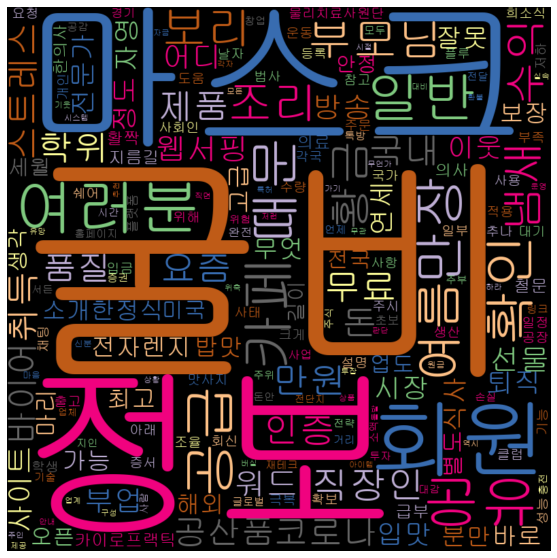

In [70]:
array = wordcloud_words_A.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupA_worldcloud.png')

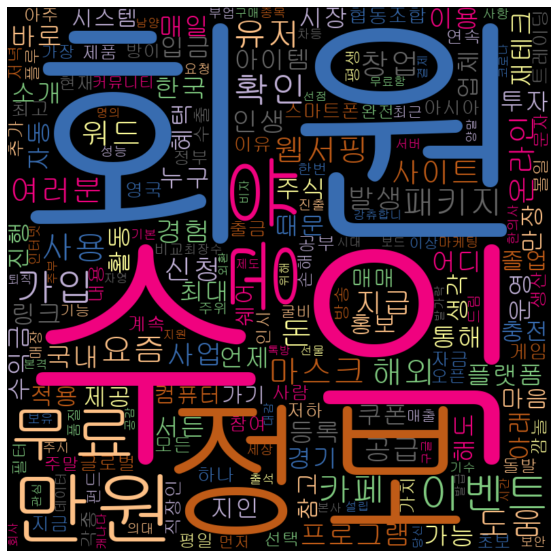

In [71]:
array = wordcloud_words_B.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupB_worldcloud.png')

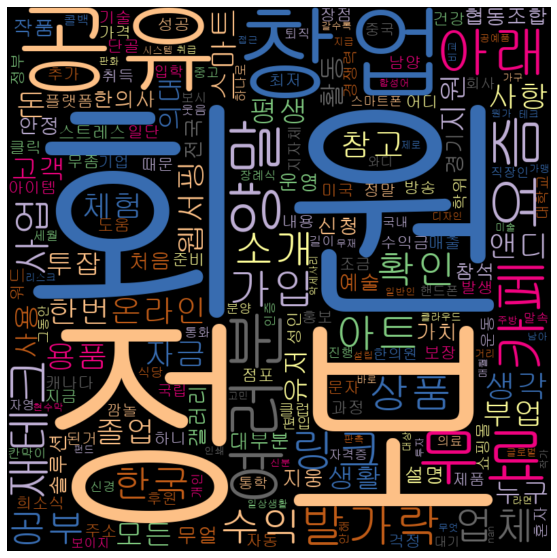

In [72]:
array = wordcloud_words_C.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupC_worldcloud.png')

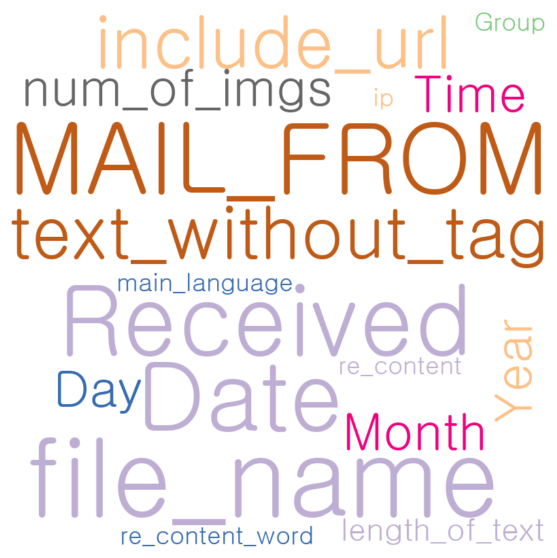

In [60]:
array = wordcloud_words_D.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupD_worldcloud.png')

# Word-Cloud 분석

In [47]:
count = -1
error_list = []
only_ko_A =only_ko[only_ko['Group']=='B']
only_ko_A.index = range(len(only_ko_A))

# only_ko_A
for i in only_ko_A['re_content']:
    count += 1
#     print(str(i))
    if '패키지' in str(i):
        print(count)
        print(only_ko_A['file_name'][count])

11
05a6c8b2-c206-4991-90f7-3d79fdf56082.eml
31
05aec814-88c2-4056-9379-e2a3c07ba572.eml
51
05be9f33-e23b-4f9e-9598-475f4ac00703.eml
55
05c0644c-3bda-4492-ae38-e6e14490f635.eml
68
05c888bc-788e-4405-bf82-c1281b17335e.eml
79
05d215b6-08b5-4e2c-9e72-1e50c1ebce0e.eml
82
05d3a9cd-4499-40a2-8d48-863f37e157ef.eml
96
05dd7348-f981-480a-837e-7929f207ae53.eml
144
06012cd6-8c4c-43b6-bc89-79cbb1fd2e08.eml
164
06074f39-6b0c-424b-b115-f8a34bdc4f8e.eml
176
060b97ce-e26b-43c0-844e-7de3b487e6e3.eml
198
061b47ba-c520-4c31-8ec2-e4d726ba4321.eml
217
062b4a31-64a9-4c69-b047-3d903ba3790e.eml
230
06330657-7688-4ceb-8842-d75529d105e1.eml
248
064060b1-3c4a-4670-a247-f35c6fa05012.eml
272
064ef6ae-b07d-4e82-852c-0b7165bed35b.eml
273
064f9fdc-6b6f-4278-964f-e4bcfcc329b7.eml
284
0655e88e-6d22-4dc4-904d-ac2b5ece52e2.eml
316
066f8ba8-25f7-4f00-8592-8049171043e9.eml
323
067330be-b773-48c5-9f82-bb85396edebe.eml
327
0675f430-3e8a-474a-8282-f18785646c79.eml
374
068c8313-714f-440e-83dc-4447554dfcc1.eml
385
06921688-b2c8-

215709d1-8a18-4e17-8cfa-5979d18a5184.eml
11356
21660a7b-a9c6-4edb-bf01-0da774125719.eml
11359
21683968-62ee-4974-b858-ee85d20ff07c.eml
11377
2171431c-733c-4d0c-96ef-b483c221b978.eml
11472
21a99744-6354-4da9-96db-726866e0200f.eml
11481
21ab7693-850a-4fd9-a3f4-67aec35ea173.eml
11505
21bde257-42de-47cb-824d-b86b7bfb3b21.eml
11510
21bf2685-8b54-44ff-aac5-901f7e3797c1.eml
11514
21c2495e-0573-426a-9557-9937a0eace2b.eml
11535
21ccbdc3-1508-4f23-8fea-cfff6088d0c0.eml
11543
21d76841-1119-490d-b721-a6c3b55f57ca.eml
11605
21fe5043-e75c-4595-9c2c-8005614f1620.eml
11611
2201276c-6716-4e04-9402-a255b8a4a7dd.eml
11615
2203432d-65d7-46b0-aab5-9bd6eac51d61.eml
11622
22055a3f-2247-4906-bd13-97755ba6ea22.eml
11669
2224a3b6-477f-4fef-980b-46c21f64492c.eml
11696
2238ca6b-c935-47ca-a8e4-55319ae26c89.eml
11733
224f9f38-61ab-4276-8d81-08dd3d7adfa0.eml
11758
225bb86a-035e-4360-a7ee-bdad848deeac.eml
11789
22770870-bce6-42e4-a816-d3cd7873264d.eml
11795
2278fb2a-eab2-4bd7-8a03-0767adb3a775.eml
11804
227d79ef-d1c3

21673
3abae773-ee6f-4077-b808-b2a78ecf790d.eml
21681
3ac3c95a-e9bf-410a-a9ae-71344ff82ece.eml
21687
3ac690d4-00bf-4a96-86fa-2a22f764167f.eml
21688
3ac6aa33-75ef-4e82-a391-f02b5b395e54.eml
21756
3af14594-55d3-49e2-bf5d-a3e41c905387.eml
21757
3af161a8-b87c-4c24-98c4-978d4ddb92bb.eml
21761
3af2488e-08b5-40af-8bee-145af69071db.eml
21777
3afae625-e7dc-4106-92e7-1d013b0b5eb7.eml
21799
3b08ff1a-1445-4518-8ad2-acc757f14254.eml
21834
3b1db6c6-4c6f-472b-b4e6-beaab2f79574.eml
21898
3b4b4e62-408e-4a7e-9a4e-7001fabd9091.eml
21910
3b569a87-90eb-49d9-aebc-8c295198f272.eml
21922
3b5d578d-b05d-4d5a-a247-b321e59a1bc6.eml
21924
3b5f1fe4-110b-4adf-91d4-a4924e7d8139.eml
21925
3b616d55-2eac-4c98-afa7-79aac405cfec.eml
21932
3b66b5c5-4e8c-4484-8009-26fd1257aec7.eml
21970
3b83f5a5-5282-470d-81f3-cad837cf4e46.eml
21972
3b84e66a-18df-4a04-b4f9-b898b1bbcc2a.eml
21999
3b93048c-da70-4489-823a-f35e1b3007a0.eml
22003
3b945292-1703-49d8-bd5b-c2c8a38b8481.eml
22105
3bd84509-e9b2-423b-ac82-c27c11a3863e.eml
22131
3be8a06

31458
52ca1747-7d48-432e-8f2f-7eae277803ff.eml
31490
52dc3916-4fb4-4285-a576-5808bf9bf254.eml
31495
52ddd053-bfa1-4838-ab2a-160f12ecdb8b.eml
31499
52e19059-4221-4c24-8057-e1eeae228a21.eml
31527
52f12c65-72cf-4bf5-86e6-1487cf229966.eml
31533
52f559a6-82d2-47a9-a7d3-d42d02f6ce9c.eml
31560
530895f5-532a-4dab-aa0c-6aa7cf12069c.eml
31600
5326bc28-1aa8-4879-800c-da16d236f40b.eml
31607
532cb828-3a06-4bdd-8510-77b1e5445b75.eml
31616
5333f3a9-e870-4bd2-ac0d-d157755eee08.eml
31621
53385554-8054-405a-8ed0-25edf2dede26.eml
31653
534baba2-cf83-46bb-aee6-c826f76cdfd9.eml
31698
53693916-2b7e-4792-93f1-293ccb4d9dcc.eml
31708
536fdd05-8c6a-42d3-b144-5fe10bc9c3a0.eml
31712
53723e85-d0e8-42ed-a0c1-debe9acf5501.eml
31721
537b8b07-f83f-4d63-9573-80cc271e78a5.eml
31774
53a06d49-b0c3-4649-aa08-8e6ef0f32d48.eml
31837
53c62950-f776-42bf-b14e-cd87b13691b9.eml
31857
53d3449d-1ce1-419e-a0e0-a57173528b61.eml
31869
53d56a99-082f-4610-afc3-fae9e4b6d5cb.eml
31870
53d69f43-7590-492d-a564-aa84127808b7.eml
31929
53f85c6

40518
68d44779-f601-4e14-bf2b-7d3d75df0a15.eml
40551
68e8ccfb-7570-4b4a-8c20-4e7e2d9fad8b.eml
40552
68ea0372-3c8e-49ca-8d29-bd1e3eaa67ca.eml
40566
68f7be67-dd5b-4179-a1a5-3c6561b2a058.eml
40603
69112c80-c128-4402-9292-a43795223c51.eml
40644
69292260-3b15-496a-90b3-5f20b48a2a09.eml
40648
692a54d1-dd19-4215-9e94-31b47b5a5227.eml
40649
692a603f-53b3-4cad-9ada-ae63f9c0b70a.eml
40656
6930427e-724b-40ff-9698-c403078fe6f3.eml
40666
69367693-a8e3-45f0-ab2f-9097d635e2f4.eml
40676
693bbac3-8398-4e7f-aef6-67b69f36bfdf.eml
40703
6948b708-9be2-4931-b460-7980aa4a8d58.eml
40758
696aea68-afcc-4f41-a294-524f205ac4a7.eml
40760
696b5f18-2b77-4a2a-bb9f-251464d39a5b.eml
40778
6978a8a4-73f1-4129-a32c-bfb20cddb4ad.eml
40822
69994329-d805-44f5-af12-3d0ffe03277e.eml
40854
69ae457e-05a7-4769-9ecc-d13daf66f368.eml
40857
69b05504-c374-4e3a-b504-df1674bf7d2c.eml
40865
69b42577-bc24-417f-90b5-b7d725c363d0.eml
40930
69d91beb-b6d0-4dfa-a21a-20032b5ec9ed.eml
40957
69e85caa-1ac6-4f95-98e1-84ab8dda7623.eml
40960
69e9448

82dff756-fc4b-4f9c-ab86-55122d10443a.eml
51150
82e0e1ce-598b-41e6-b6ba-1a634c7d9efd.eml
51152
82e3a2dd-0aa4-485b-a6f3-765efa230a09.eml
51172
82eeee07-d119-48e4-8fbc-f60d86a457f1.eml
51173
82efbb98-1eaa-468e-9dd2-56b008a252b3.eml
51203
82fefe67-08c2-42dc-aaa5-5513d6550699.eml
51206
830250f4-f7df-4860-a2ba-97ffb92b384b.eml
51235
8314a350-7996-4b6e-9f81-90d2fd8fd6f0.eml
51240
8316524a-cf43-4df1-8108-9adde49763e5.eml
51268
832945fe-6a0a-4264-845b-a0a69e860fcb.eml
51273
832c23ac-3da1-4a37-8779-1956faae1209.eml
51278
832e2615-8550-47a8-bbfc-daf754b4c441.eml
51313
8349258d-c170-4557-9492-4233735ac246.eml
51377
836dc12c-0967-4537-b135-7ed839021a78.eml
51403
8381901d-d055-414a-a707-f70135a7f900.eml
51404
8381bb2b-e704-48e0-be94-7e7444e2dadd.eml
51414
83872495-25d9-47a0-91d9-c7270f8e33e1.eml
51440
83928dcb-5d12-49d7-bf3c-ea5e424fbabc.eml
51470
83a411d7-65d0-4038-9dae-c396c20d49e8.eml
51478
83aa751f-1735-4fb3-803d-1153780b1881.eml
51494
83b32126-ba9b-453e-9443-0a8cf0f80a66.eml
51498
83b498a0-e23e

97d75c4d-c162-4dac-992c-db98d3a890a6.eml
59648
97da570b-d0ff-49ba-8703-8b283b1c371c.eml
59653
97ddf8e6-220e-4654-b360-77e3caaba361.eml
59657
97e01176-b912-49c0-8ca6-a454c788035a.eml
59728
98112072-5b0e-4023-b32d-bf96575d11ba.eml
59753
9825c6ca-f307-48b8-adb2-13d93a8f961e.eml
59757
9827078a-843e-4796-ae3a-d1881395cbc2.eml
59800
983e855b-ce2f-48ee-a4ef-e7add7fdd718.eml
59803
9844789d-01cb-41a7-84b0-27dd0283dbdf.eml
59807
98476202-f349-4c69-85a5-dd3384392534.eml
59833
9856770e-29c3-4d4e-9a1c-d90c0096eb73.eml
59845
985e7ec0-7098-4ea4-a5a8-983343a69d5c.eml
59870
986b881f-ead1-407f-9ceb-c8f2a9604f7d.eml
59886
98741658-23e6-4eef-a8c8-fa18910812f0.eml
59912
98847961-d49b-4b8d-ba09-d2f8ecda49dc.eml
59971
98a7a8f0-3ef2-4109-9b18-c468ae43818e.eml
59998
98b969ac-c331-4d64-a495-4745147a5041.eml
60009
98bf058c-e4b8-4606-b596-407072f7717a.eml
60029
98cd9805-90fa-41b9-a735-b1fcffa1d05f.eml
60047
98d92385-2e69-4e28-8558-a4c95e0ce628.eml
60050
98da59e9-3e43-4ce6-a55e-eb83caea9ece.eml
60059
98e3afa7-a98a

70727
b336fbe2-e000-4177-974c-bd8f6cc9d3a6.eml
70757
b346fa8d-d122-4123-9337-ce6209dde0ce.eml
70766
b34c1bd8-3ebe-450d-857d-4407357d9e92.eml
70768
b34e4189-1304-480a-8038-661fb567e674.eml
70798
b3651bc4-fa8a-4385-a1d6-c74142f40324.eml
70804
b36db2b2-15fe-43bf-a528-eee6d2a16146.eml
70811
b37102a2-b2af-4b26-9cf6-9bb370b9df22.eml
70813
b37379c0-445d-4fd2-acc4-9927b913100f.eml
70815
b3748633-cb40-457d-a670-1af75545e2ef.eml
70844
b3857812-e8a2-4ec3-8e6e-a626cd694349.eml
70853
b389efce-3ed0-4dd7-bbfe-be99eccc8b9f.eml
70861
b38f43a5-cd39-4a93-9645-87833a3cab78.eml
70892
b3a32750-b031-4be7-97c2-03279656721c.eml
70901
b3a91f57-b485-4c0d-b078-08ce3cc33818.eml
70902
b3aaa1de-ece9-4653-abc7-23c61753af17.eml
70965
b3c8395f-f21b-4be8-ba69-26c3470feafc.eml
70966
b3c8556c-e982-4c67-8012-dddb0dac09d8.eml
70982
b3d12610-8321-45f6-b652-97df12caf1b4.eml
70983
b3d16a1b-2311-41df-9ba7-cbd60bec6772.eml
70999
b3e31874-f2eb-4ae1-a78e-8aa9b0d1b405.eml
71037
b3f8920e-c508-4ff3-ab8c-14f2b6649639.eml
71051
b4013dd

82289
cf41fd4b-f146-48fd-b133-7752d86b3409.eml
82308
cf4e6a4b-9895-430a-81bf-ef03b3f0c91c.eml
82315
cf52c1db-6914-484c-b26e-2c8d971d3c95.eml
82352
cf69cb2c-7dc7-4bfb-af59-665e774a9353.eml
82365
cf6e9c9c-de54-41b3-bed4-2e790dc86691.eml
82373
cf72348d-93a1-4b3e-bddc-6059da183d2e.eml
82398
cf7b7986-1356-4a97-8975-8df988e41cf1.eml
82408
cf8116c3-a61f-4fe5-9eae-4ef855ad3afa.eml
82420
cf8f6be8-3282-42b0-bb04-1e833101338f.eml
82430
cf95e90e-5026-445b-9aa0-c6e69464fd3d.eml
82432
cf966148-fa2b-49e6-aaf3-9875bcfa0468.eml
82438
cf99565a-f31f-4816-99c6-04c5e9d8d5a1.eml
82459
cfae9796-381c-443d-93c5-4aed1f42d861.eml
82471
cfb5c45f-5d6e-4898-b70c-433b7a6e1a0a.eml
82473
cfb6470b-9258-4523-b33b-04517bc64f79.eml
82490
cfbd0fe5-6b11-424d-a8d8-10b73d69a083.eml
82529
cfd789ad-27e7-4aba-9b9e-861806496ff2.eml
82559
cfec99a3-0b8f-4db2-832f-494a3a25fc2b.eml
82564
cff0a70e-fc08-4cd4-9447-5b337bac294e.eml
82567
cff2addf-dff5-47fc-8c67-73dc160e5700.eml
82581
cff8cc18-6be5-476b-9f37-3c5e6ba15f68.eml
82609
d0087ac

e5ed97e3-ecf4-4bbb-99c7-38c575f70332.eml
91304
e5f3cb5a-8c96-4b59-a709-c7e30ac7435c.eml
91308
e5f5e1d5-4d33-4ed9-aa9f-9c02ffc067b1.eml
91310
e5f71c97-be28-4166-8f2e-6e92520067e5.eml
91312
e5f7a864-e701-4bdf-84fc-a525e84d08a3.eml
91315
e5f915e3-e38f-475d-9c79-89e06fea2ecc.eml
91316
e5f97bad-962e-4d3f-8302-0e667e4b329e.eml
91323
e5fd22ee-670c-45bb-9024-16f0d9484968.eml
91327
e5fe6114-469b-406d-a112-bbe370b40b04.eml
91339
e6043aa7-aa46-49da-95af-a6bee0375003.eml
91386
e62da7f9-9166-42d7-afa2-e669dd12a133.eml
91395
e6314fe5-3e1a-4dc2-bcef-e5fe411abf91.eml
91417
e63d24af-d131-4371-b169-bd8a3907c008.eml
91456
e6522ce4-1a60-43c5-ae6d-7551aed06556.eml
91469
e658a786-9d6c-4415-972d-f010375995c6.eml
91493
e665500a-9283-4011-8096-5fc39b6ab212.eml
91522
e677e750-c421-4da1-93f2-386ab698c4fb.eml
91526
e6796868-2797-42d4-8db1-a5401ce43dd4.eml
91528
e67cbac7-3ffd-4db7-9454-924a9cd1846a.eml
91531
e67f1429-f255-4f33-b012-c105b534df59.eml
91537
e684e6a4-cb5a-4ad9-a0ed-6024cebe5fac.eml
91545
e68a6677-59bf

ff94385b-c781-471b-8b6b-cd199d42c984.eml
101736
ffc8b723-09a1-411c-a812-7dd684bf700f.eml
101762
ffd86e88-e96c-42a9-8296-88fa48eb9e2d.eml
101769
ffdcd807-90b7-4ba6-93ae-ebe168ac6c9d.eml
101773
ffddf4bd-1ff0-40e3-9630-8aaee25f2f1b.eml
101783
ffe82c79-22bb-412a-b840-4fa198c0bac0.eml
101813
fffc4086-1128-4a82-bbcd-96e1cb794636.eml


In [48]:
count = -1
error_list = []
only_ko_A =only_ko[only_ko['Group']=='B']
only_ko_A.index = range(len(only_ko_A))

for i in only_ko_A['text_without_tag']:
    count += 1
#     print(str(i))
    if '패키지' in str(i):
        print(count)
        print(only_ko_A['file_name'][count])
#         print(count)
#         print(i)
#         error_list.append(count)

11
05a6c8b2-c206-4991-90f7-3d79fdf56082.eml
31
05aec814-88c2-4056-9379-e2a3c07ba572.eml
51
05be9f33-e23b-4f9e-9598-475f4ac00703.eml
55
05c0644c-3bda-4492-ae38-e6e14490f635.eml
68
05c888bc-788e-4405-bf82-c1281b17335e.eml
79
05d215b6-08b5-4e2c-9e72-1e50c1ebce0e.eml
82
05d3a9cd-4499-40a2-8d48-863f37e157ef.eml
96
05dd7348-f981-480a-837e-7929f207ae53.eml
144
06012cd6-8c4c-43b6-bc89-79cbb1fd2e08.eml
164
06074f39-6b0c-424b-b115-f8a34bdc4f8e.eml
176
060b97ce-e26b-43c0-844e-7de3b487e6e3.eml
198
061b47ba-c520-4c31-8ec2-e4d726ba4321.eml
217
062b4a31-64a9-4c69-b047-3d903ba3790e.eml
230
06330657-7688-4ceb-8842-d75529d105e1.eml
248
064060b1-3c4a-4670-a247-f35c6fa05012.eml
272
064ef6ae-b07d-4e82-852c-0b7165bed35b.eml
273
064f9fdc-6b6f-4278-964f-e4bcfcc329b7.eml
284
0655e88e-6d22-4dc4-904d-ac2b5ece52e2.eml
316
066f8ba8-25f7-4f00-8592-8049171043e9.eml
323
067330be-b773-48c5-9f82-bb85396edebe.eml
327
0675f430-3e8a-474a-8282-f18785646c79.eml
374
068c8313-714f-440e-83dc-4447554dfcc1.eml
385
06921688-b2c8-

28425973-3df7-4258-9e50-577d7cf3eae6.eml
14312
285deae7-58d1-4418-b27f-c393977ffa78.eml
14315
28606dad-2980-427e-87a3-1cecbb194161.eml
14339
28751245-2f20-432b-910d-7af919e6240f.eml
14357
2884bed6-d842-4a3b-88d5-5033c0e1ba2a.eml
14372
288c3ce8-9334-48d1-8f28-00f40de60c29.eml
14375
288d6e68-7fab-4115-9d0c-fdeb32a37090.eml
14388
2893de6f-e2c3-486f-8f3d-88903e26fbb4.eml
14401
289b63d2-6971-44a4-ab20-e578c06fd3b4.eml
14408
28a275db-a003-46f5-bf67-f1919aabad21.eml
14411
28a56ed1-55d9-44a1-ad25-e5ebb760c388.eml
14446
28be78ab-1671-4628-8bfb-08ed03e7a153.eml
14459
28c41c21-936a-4d0e-ba55-2a2869b2b619.eml
14461
28c460ab-aff3-4c26-91f1-7778fe9c084a.eml
14464
28c52b62-47ba-4e5b-9152-558d8eddec36.eml
14491
28d5b3c2-adc5-462f-8e69-7acbea74e9e6.eml
14495
28d6804e-2fad-487c-8972-00f29c344a74.eml
14531
28f0b684-1eac-4c20-ac77-932e23a4e7ae.eml
14538
28f2a55d-d3a0-4ae3-9a42-733f0bd28497.eml
14541
28f55c42-e7bb-40c4-88f7-914dae2f037c.eml
14544
28f5c849-c95b-4bc5-9bbf-c871b132873b.eml
14554
28fb522c-9d3e

3d26cef2-87cc-4f88-95f3-b801ea52783a.eml
22635
3d3569d0-35bc-4a2e-a2a0-5cee48ba0695.eml
22703
3d5c03e1-66a2-41e3-b01f-49a6dc05e460.eml
22704
3d5cab62-b8d7-4873-a315-285344c67a64.eml
22734
3d6f5309-46fd-431a-bf3e-516535aeb1ad.eml
22740
3d7554a4-5235-490c-96c9-b684b140ab37.eml
22803
3d9dacd4-f98b-48a3-8b3e-918f8354ee37.eml
22814
3da4260a-0614-4395-ac40-571b88f21e41.eml
22832
3dab78f1-71b2-4c15-9b62-e6a5579a1ea7.eml
22851
3db777ae-ff89-427e-977c-7ee913502269.eml
22867
3dbc4f9a-2446-4a00-b8ba-684089807834.eml
22870
3dbd945d-f881-4ad7-895a-5f4625905874.eml
22905
3dd19a79-e868-4556-847e-5de41deb304b.eml
22917
3dd91a08-01f3-465e-8dbf-0612407b9a8c.eml
22937
3de40a58-6ca1-48e1-9671-8437296333cb.eml
22938
3de41c6b-73a6-424a-87ec-e79593e55393.eml
22942
3de7d59e-308f-4ed6-99f0-70f52d870d08.eml
22970
3dfebdd3-9d7e-4043-8bd6-c8b474cbb16a.eml
22976
3e03731e-0888-48eb-ba40-35a11faaba03.eml
22983
3e072e3f-b817-40b3-8196-e4a1f6568de7.eml
22990
3e0a2d09-686a-4fdd-9f39-df545cf2be54.eml
23013
3e16995d-a4c3

33490
57bcc06f-3b5e-4050-8446-1f5f0ca0a67b.eml
33495
57c085d3-b051-488e-8f48-42e839e3db4e.eml
33498
57c67c42-3161-4090-9749-625e591a7c53.eml
33508
57ce878e-8dda-4b5b-8c96-a5dcba569540.eml
33511
57d00cd1-f4b3-4ff5-bcfc-750093b560c0.eml
33519
57d48700-75c0-4a3f-90da-87cdfc7cc5ba.eml
33544
57e23e3c-730f-437e-8598-71c398f23d4f.eml
33546
57e296ec-b0e2-410a-a7f9-0b45fac0f030.eml
33565
57ef0c3f-78da-4009-b826-2513474d4b81.eml
33594
57fc12fa-943c-42ee-be99-2ee6e200bd4a.eml
33598
57fd0652-2754-4c1f-a639-aa418c4539e0.eml
33605
57ff906c-9740-4dec-a477-856454440692.eml
33619
58054143-4f28-417d-8262-3914d7202037.eml
33637
58113089-da15-446c-a0eb-653e6c0f3da9.eml
33657
581d5169-da16-48ae-acb3-8e15429e3814.eml
33693
582caf6a-d6cc-4802-93e5-47b1cc6a6e05.eml
33702
5831af33-8479-471d-b62f-75e0a8869fc0.eml
33731
58485560-c101-4b61-987b-d1054bb7864a.eml
33747
585163df-71de-4a4b-a2d0-b9dab8e734de.eml
33751
5852b004-44cb-4c16-bdc0-3392a544d6de.eml
33774
585e4e58-a432-4d53-8300-32a9133459ab.eml
33785
5866cc6

6ac9c952-af03-4d26-85f0-a34db38cc44f.eml
41339
6ad9cdc4-8475-45e9-a347-cf5fb3cf2956.eml
41358
6ae43a71-c4e3-4870-a710-c514d2e2fe92.eml
41396
6af688aa-5786-46de-ac94-79f49c3591c2.eml
41403
6afa42c3-9296-4616-9769-5ad7d3b448a2.eml
41404
6afaed07-722a-4931-9dfc-ce59d75cc824.eml
41425
6b0fe0dc-61af-4bb5-84b2-337a0947ad90.eml
41437
6b17ef6c-aacc-4a72-8de8-18844cbbae88.eml
41472
6b2e9345-907f-4b14-a2e7-ea08aecbb9cc.eml
41478
6b34b74e-2d40-4bf5-b5d0-f14594360556.eml
41490
6b3ab8a0-fe6f-4a5f-b14a-3e822626c0c6.eml
41498
6b3ef725-5a7b-4bb6-a196-d11df3b2ac6c.eml
41506
6b42851a-52d5-4434-9740-5d3908084b93.eml
41515
6b4796eb-b475-4b94-bd6f-3fb01442328f.eml
41525
6b4cd753-53d7-4169-a063-4a6f1f744f79.eml
41574
6b66a9da-138a-468d-981e-c109eab8d310.eml
41575
6b66e4bc-a45f-40e9-9bcc-9c5ffc528bde.eml
41593
6b715d61-2760-4b4b-95c0-e9deb57c36de.eml
41603
6b774554-dd0a-4ec6-95ec-b6931d1c1f90.eml
41606
6b7b6c99-2bfc-47c3-9028-28a9172883e8.eml
41611
6b7de987-d33c-4522-b7e3-5b7868979171.eml
41628
6b874d99-cabc

81c9be50-c4d6-4ce8-9efa-6108d78b7bf6.eml
50688
81ca70e7-0ce1-402d-8afe-9722226c5df3.eml
50694
81ce9c55-15bf-4f63-93ec-78722994484b.eml
50699
81d23c22-3e7d-4c00-ba36-871dc07dbb7d.eml
50704
81d86304-ecbb-4036-9d7f-7e4943a6a2b4.eml
50732
81f3f0b7-caf9-4904-b6d5-a55e634c3433.eml
50749
8201d424-b5b4-42fc-8736-3098c77f81b9.eml
50782
821660c5-a5ec-4b04-a09b-094c74ac910b.eml
50789
821a7c5b-f62a-453f-8210-21f97ff291ee.eml
50805
8224c53b-637f-4f5f-87b5-50e05c3854e3.eml
50807
82259040-0118-46ae-96aa-c45c6e750738.eml
50834
8238ff1b-6149-4f28-846b-ae95e5a9192b.eml
50880
825047f6-4ab1-4235-97e4-8bae9fe19be1.eml
50913
8263034a-bfdb-4294-9ce6-243dfd13ad7c.eml
50921
8265b977-c251-4f19-a3ce-6ff40b316f77.eml
50932
826d93b3-2a84-4c68-9d28-2c8a65a4e967.eml
50938
826ed6d4-196a-483d-ba34-543fcc21b558.eml
50964
827f43c5-6f05-4f24-a0eb-569653fd5d22.eml
50966
8280f610-caeb-4e41-9abd-741023c9dff6.eml
50969
82822a15-2f26-43e2-835a-46dba4263c4e.eml
50976
828510ce-86a1-4351-94ab-88680221cefe.eml
50981
82886618-38b8

922cfc1a-b356-4a55-b3c6-c4f29d3247cf.eml
57318
923451e0-8479-4bfa-9485-5313f52cbbe3.eml
57352
924eb0b4-71f1-46ef-b6e6-b920fa7debe9.eml
57401
9268d311-63ec-4782-bd46-563478633ed6.eml
57403
926964ba-af24-4952-936d-9d9ed519de2b.eml
57446
9288e346-3d6f-4b2a-8bd9-c69ce251ec93.eml
57451
928a31d1-7d6a-4549-a543-f20023ee6a50.eml
57460
928f5f56-0ace-4900-94bf-d5b68018b766.eml
57477
9299912e-dbca-4d84-9ce5-386bd7fc23f1.eml
57516
92b3b194-955c-4750-ab04-3146649ae73f.eml
57524
92b82c6d-8655-4d61-9f77-9ec6186df91e.eml
57549
92cb7715-29bf-4d5d-8aaf-4216ae2c2c7e.eml
57588
92e506b4-4a57-4d74-8279-5368038bdf50.eml
57604
92f1f120-65ec-478a-a3b6-540039055cc1.eml
57634
93010c12-08e3-4609-bb3c-8e14b74fe380.eml
57673
931a571c-f3fb-4a8f-b7b8-34e7d4b78cbb.eml
57728
9338621f-f794-4aa5-8644-0c35613f8cc8.eml
57757
934dbe4e-9b19-41b9-a880-6a2f22a20f81.eml
57784
935e12b3-b93e-4b5d-980c-2def713d77be.eml
57831
93790709-88bb-4fc4-8e75-c1142c0991ab.eml
57844
93807b95-484c-466d-9ca9-9d525eaf648c.eml
57878
938e9568-3c1b

a2a591e4-f631-4d9d-af85-f7f60bcc7720.eml
64029
a2aeb55a-a73d-4ccc-9ba4-5712d15ec959.eml
64086
a2d23687-95cb-4add-ac09-e14aae966a9a.eml
64139
a2f01f9a-712f-4149-98f0-74b83f46f145.eml
64148
a2f5263b-3c7a-4ec6-90ee-565d26769fd7.eml
64164
a300dac1-2612-4388-b903-011285e95b6e.eml
64165
a300e59a-17b4-4ae2-b367-4824d740e52f.eml
64174
a30b02a0-1031-44dd-b440-853648cae149.eml
64183
a310ab10-0953-4aed-88d0-a36d4567d50c.eml
64188
a31236f0-f6ed-4663-86fa-31ffb64ae330.eml
64194
a3152d47-585e-4418-8dba-708ad6c968d1.eml
64200
a319e0f3-da60-4582-a6e1-2a2cacf074da.eml
64203
a31b5170-d930-4c1f-b09f-c1709e75dd35.eml
64214
a323ae54-2602-4a64-a21f-5a24f40abef1.eml
64237
a330f336-d7f1-4f25-8419-4226d8c376b3.eml
64280
a351eb24-06dc-448f-987d-e30b45708ced.eml
64293
a35b728c-bde5-46d3-9029-2b03ca28184c.eml
64294
a35c8d19-854d-4bfe-9d38-43747dd20a75.eml
64311
a367ed12-a42b-4265-94c4-e2ed93ba995e.eml
64325
a3712cd1-ddda-4a4a-84e0-ca31aa6171f7.eml
64328
a372d39c-5410-4122-bd0d-8b4c03afaac4.eml
64332
a3757f77-da93

73880
bae1f198-3dc4-4c38-885b-ec947fd6697d.eml
73881
bae1f309-f5c5-4f3f-89c5-c78b6245e422.eml
73961
bb0d9e76-deec-412e-a77b-0f53933f3eb5.eml
73970
bb13684c-d7c2-4400-b763-f20f6c012acc.eml
73978
bb1d3e74-b187-42c4-bd3a-ad9f07cbac27.eml
73979
bb1d47dc-35b9-4717-9b90-100998814236.eml
74008
bb2be3af-61e4-4df3-ab96-b92307e6f2cd.eml
74020
bb35f20d-eb10-4df8-af57-503cfa07d38f.eml
74047
bb4abb3f-26bd-4b4e-9b9c-cc38b270dac4.eml
74070
bb565f62-64ef-478d-856a-2da134bd9acf.eml
74120
bb79f267-a4e9-4a1c-b45c-15d9e69edfe6.eml
74131
bb80e809-fd1a-46a5-b447-b5bd73c3d95b.eml
74133
bb83703a-fe58-45d9-961e-2952c2b0b45e.eml
74139
bb861c65-b29f-47c8-ac03-0aca3d857deb.eml
74163
bb94a720-2101-4bdc-af35-90258a9f1dde.eml
74177
bb9ca89e-d7a5-44f1-b281-b620d9066b38.eml
74198
bbaac4ea-cf48-40eb-b164-eae44ea5b759.eml
74211
bbb31ffb-3c50-4b97-9968-ad3588a335ab.eml
74224
bbba4c34-7192-4fdf-8ee2-1fa776e33b38.eml
74233
bbbfa71a-2284-435c-b2e8-e508aa2b06ca.eml
74238
bbc2ab80-db2c-439c-9edf-1ba7b0fbf1da.eml
74274
bbd9d6a

d06cd0be-5fd6-4476-ad02-601813bab05b.eml
82761
d072cfb7-94bd-459d-9438-9298db22347d.eml
82800
d08c78ce-7cc0-4eec-b80a-e1b1e840164f.eml
82801
d08d11ab-0007-4ade-8865-bfae5e764712.eml
82802
d08da21b-1065-4970-ab7f-8b8bee60dd70.eml
82823
d097b052-cadc-4b54-8a1c-438bc2f98989.eml
82849
d0aae422-4468-42ff-9dc4-74a106d3461b.eml
82850
d0aaed4d-a2c6-4f29-8771-3ea2043dcbd8.eml
82937
d0e102cd-bae0-4cd5-9c52-1c599a8999e5.eml
82947
d0e672ba-f84c-44ee-b7d4-547c556a4eba.eml
82949
d0e79775-cfb3-4470-b0b8-d50a503308b7.eml
82968
d0f9b998-a870-41a3-ac46-86c6cfe2b99b.eml
83004
d1142a5f-f7fe-44fa-88ec-0ac66a445deb.eml
83008
d11785f1-9347-40e3-a0fb-1d999a524295.eml
83036
d129b456-b26b-48de-91f3-7c66a731ec6f.eml
83063
d13b504e-f157-42e8-a3a4-46a6db308755.eml
83097
d14deac1-c8a7-4100-89d4-2743df6083c7.eml
83098
d14e680e-295c-4d5d-91d3-b52b6d6aed92.eml
83108
d157026b-5646-4902-9702-ba64491c55d7.eml
83155
d1753867-f422-4593-a536-b4d2f808c3d1.eml
83158
d176e9b6-c93c-4196-bc2b-dbd10c197b9c.eml
83165
d17a7a71-eb48

91674
e6df9635-b7ac-4f7f-ae42-6f03383cf283.eml
91680
e6e17466-b6f6-4a2a-9d87-8c11a72dfa25.eml
91701
e6eea7a1-27f2-4a58-9b78-20f90d9ea61f.eml
91762
e717266a-9b8b-46dc-8e3f-bbd12d983c34.eml
91805
e72d58ed-66fc-4c8b-aa43-44c5943ccd89.eml
91809
e7300ec4-a457-426c-9043-1de7c30e6310.eml
91810
e730ea97-3d97-43ba-a75c-50c5be60a6b0.eml
91814
e7363c92-a903-4bca-8276-1a501ceadc0b.eml
91845
e747d21a-66ae-453a-8cb5-9a0612b6085c.eml
91891
e7691ae9-b52d-4c30-9800-ba62c6f0341e.eml
91904
e7775309-d65a-4c4e-9e44-f7445ba292f0.eml
91933
e789d9b6-77ea-43d6-8fc9-7ea21abd1efd.eml
91937
e78c7e67-9c6c-497d-b7b1-d7885cccdde6.eml
91940
e78f331b-eab9-47c8-b37f-3059d33eb4d9.eml
91942
e79030c1-6b5d-49a2-94d6-3a51fe425165.eml
91972
e79ccb42-4178-4c0a-942c-e7cc4da5f658.eml
92009
e7b8ce6c-6b8c-445e-b32b-2da2fef5daae.eml
92042
e7d3a1af-15fd-4a21-a961-7a8d0b99cd33.eml
92085
e7f203dc-6c67-495f-9eda-e992a10150d6.eml
92092
e7f414f7-7419-4075-a369-6b1b25996a78.eml
92099
e7f92e01-323d-4998-9654-12b15e9eba46.eml
92100
e7f95b8